In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### DATA

In [266]:
data = pd.read_csv('data/ONLINE_RETAILS.xlsx - Online Retail.csv')

In [267]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom


In [268]:
data.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate UnitPrice  CustomerID

### Changement du format de la date 

In [269]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data = data.set_index('InvoiceDate')

In [270]:
data = data.set_index('InvoiceDate')

KeyError: "None of ['InvoiceDate'] are in the columns"

#### format date

## preprocessing

##### Objectif :
- comprendre les données 
- suppression de valeurs null

In [271]:
data.describe()

,Quantity,CustomerID
count,541909.000000,406829.000000
mean,9.552250,15287.690570
std,218.081158,1713.600303
min,-80995.000000,12346.000000
25%,1.000000,13953.000000
50%,3.000000,15152.000000
75%,10.000000,16791.000000
max,80995.000000,18287.000000


<AxesSubplot:>

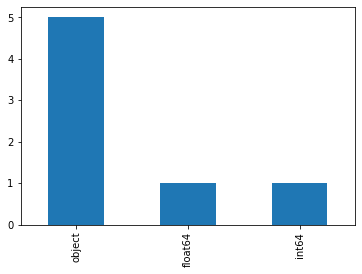

In [272]:
data.dtypes.value_counts().plot.bar()

In [273]:
data.index

DatetimeIndex(['2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:28:00',
               '2010-12-01 08:28:00', '2010-12-01 08:34:00',
               ...
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=541909, freq=None)

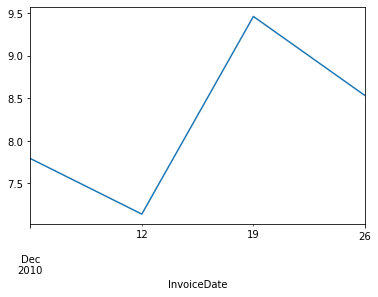

In [274]:
data.loc['2010', 'Quantity'].resample('W').mean().plot()
plt.show()

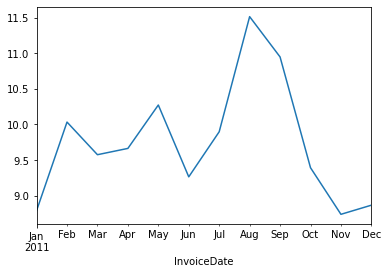

In [275]:
data.loc['2011', 'Quantity'].resample('M').mean().plot()
plt.show()

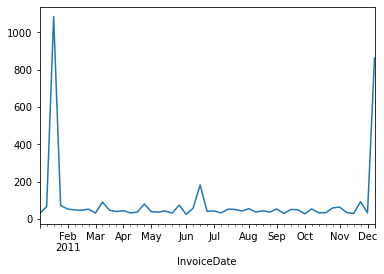

In [276]:
data.loc['2011', 'Quantity'].resample('W').std().plot()
plt.show()

---

# NETTOYAGE DES DONNES

In [277]:
data_nettoyer = data.copy()

In [278]:
data_nettoyer = data_nettoyer[data_nettoyer['Quantity'] > 0]

In [279]:
data_nettoyer.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [280]:
data_nettoyer = data_nettoyer.reset_index()
data_nettoyer['Annee'] = data_nettoyer['InvoiceDate'].dt.year
data_nettoyer['Mois'] = data_nettoyer['InvoiceDate'].dt.month
data_nettoyer['Jour'] = data_nettoyer['InvoiceDate'].dt.day
data_nettoyer.dropna(inplace=True)
data_nettoyer = data_nettoyer.drop_duplicates()
data_nettoyer = data_nettoyer[~(data_nettoyer.CustomerID.isnull())]
print(data_nettoyer.isna().sum())


InvoiceDate    0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
Annee          0
Mois           0
Jour           0
dtype: int64


#### DATA NETTOYER

In [281]:
data_nettoyer.head(5)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,"2,55",17850.0,United Kingdom,2010,12,1
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,"3,39",17850.0,United Kingdom,2010,12,1
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,"2,75",17850.0,United Kingdom,2010,12,1
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,"3,39",17850.0,United Kingdom,2010,12,1
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,"3,39",17850.0,United Kingdom,2010,12,1


In [282]:
data_nettoyer['UnitPrice'] = data_nettoyer['UnitPrice'].apply(lambda x: float(x.split()[0].replace(',', '.')))

In [283]:
data_nettoyer['Depense'] = data_nettoyer.Quantity * data_nettoyer.UnitPrice

In [284]:
data_nettoyer.tail(4)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour,Depense
531281,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011,12,9,12.60
531282,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011,12,9,16.60
531283,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011,12,9,16.60
531284,2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,2011,12,9,14.85


---

## I. QUESTIONS (10 points)

##### 1. Volume. 
- Lors d’une dépense, combien de produits un client achète-t-il généralement? 
- Tracez la distribution associée. Faîtes apparaître le nombre moyen et le nombre médian de produits acheté lors d’une dépense, par pays.

In [285]:
question_1 = data_nettoyer.groupby(['CustomerID']).agg({'Quantity':'sum'})

In [286]:
question_1 = question_1.reset_index()
question_1.head()

,CustomerID,Quantity
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


In [287]:
combien_de_produits = question_1.mean()
print("Le nombre moyen des produits qu'un client achete generalement :",combien_de_produits.Quantity.round(2))

Le nombre moyen des produits qu'un client achete generalement : 1190.57


#### Distribution associée.

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

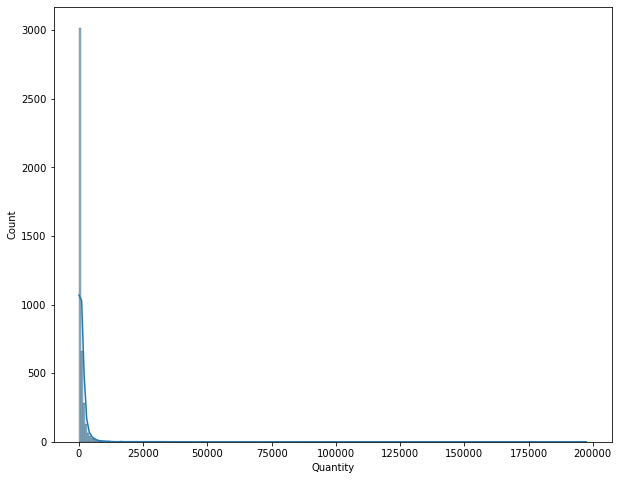

In [288]:
plt.figure(figsize=(10,8))
sns.histplot(data=question_1, x="Quantity", kde=True, bins=250)

#### Faîtes apparaître le nombre moyen et le nombre médian de produits acheté lors d’une dépense, par pays.

### - Le nombre moyen des produits achetés lors d’une dépense, par pays.

In [289]:
data_nettoyer.groupby(['Country']).agg({'Quantity':'mean'})

,Quantity
Country,
Australia,71.114020
Austria,12.263819
Bahrain,15.294118
Belgium,11.441162
Brazil,11.125000
Canada,18.298013
Channel Islands,12.697456
Cyprus,10.514096
Czech Republic,26.840000


--- 

## - Le nombre median des produits achetés lors d’une dépense, par pays.

In [290]:
data_nettoyer.groupby(['Country']).agg({'Quantity':'median'})

,Quantity
Country,
Australia,32
Austria,10
Bahrain,6
Belgium,10
Brazil,10
Canada,12
Channel Islands,10
Cyprus,6
Czech Republic,24


---

### Lors d’une dépense, combien de produits un client achète-t-il généralement?

# 2. Montant. 
- Lors d’une dépense, quel est le montant dépensé par un client généralement ? 
- Tracez la distribution associée. Faîtes apparaître le montant moyen et le montant médian d’un panier client, par pays.

## Lors d’une dépense, quel est le montant dépensé par un client généralement ?

In [291]:
produit_acheter = data_nettoyer.groupby(['CustomerID']).agg({'StockCode':'count'}).reset_index()
produit_acheter

,CustomerID,StockCode
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,721


In [292]:
print("En moyenne un client achete : ", np.mean(produit_acheter['StockCode']), "produits")

En moyenne un client achete :  90.51209956211109 produits


### Tracez la distribution associée.

<AxesSubplot:xlabel='StockCode', ylabel='Count'>

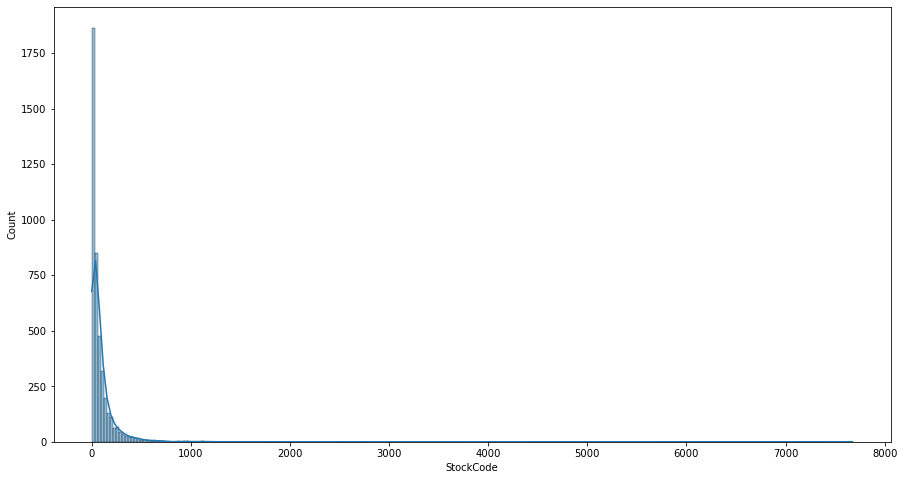

In [293]:
plt.figure(figsize=(15,8))
sns.histplot(data=produit_acheter, x="StockCode", kde=True, bins=250)

## Faîtes apparaître le nombre moyen de produits acheté lors d’une dépense, par pays.

In [294]:
montant_moyen = data_nettoyer.groupby(['Country']).agg({'Depense':'mean'})
montant_moyen

,Depense
Country,
Australia,116.937340
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.363507
Cyprus,22.392786
Czech Republic,33.069600


## Faîtes apparaître le nombre médian de produits acheté lors d’une dépense, par pays.

In [295]:
montant_Median = data_nettoyer.groupby(['Country']).agg({'Depense':'median'})
montant_Median

,Depense
Country,
Australia,66.00
Austria,17.17
Bahrain,25.50
Belgium,16.60
Brazil,19.65
Canada,16.50
Channel Islands,17.70
Cyprus,16.50
Czech Republic,31.20


<AxesSubplot:xlabel='StockCode', ylabel='Count'>

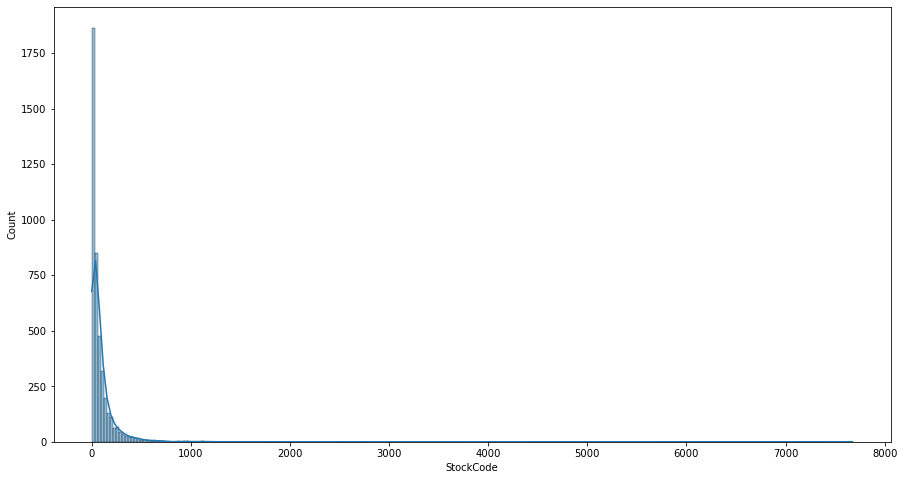

In [296]:
plt.figure(figsize=(15,8))
sns.histplot(data=produit_acheter, x="StockCode", kde=True, bins=250)

# 3. Volume. 
- Quels sont les top-5 produits les plus vendus durant le premier trimestre 2011 ? 
- Pendant le second trimestre 2011 ?

In [297]:
data_nettoyer_trimestre = data_nettoyer.copy()

In [298]:
data_nettoyer_trimestre.head(2)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour,Depense
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,1,20.34


In [299]:
data1 = (data_nettoyer['Annee']==2011)
data1 = data_nettoyer[data1]

In [300]:
data1.head(2)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour,Depense
41683,2011-01-04 10:00:00,539993,22386,JUMBO BAG PINK POLKADOT,10,1.95,13313.0,United Kingdom,2011,1,4,19.5
41684,2011-01-04 10:00:00,539993,21499,BLUE POLKADOT WRAP,25,0.42,13313.0,United Kingdom,2011,1,4,10.5


In [301]:
data2 = (data1['Mois'].between(1,3))

In [302]:
data_nettoyer_trimestre = data1[data2]

In [303]:
data_nettoyer_trimestre.tail()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour,Depense
139127,2011-03-31 19:54:00,548548,22423,REGENCY CAKESTAND 3 TIER,1,12.75,17781.0,United Kingdom,2011,3,31,12.75
139128,2011-03-31 19:54:00,548548,21361,LOVE LARGE WOOD LETTERS,7,12.75,17781.0,United Kingdom,2011,3,31,89.25
139129,2011-03-31 19:55:00,548549,84763,ZINC FINISH 15CM PLANTER POTS,100,1.06,16365.0,United Kingdom,2011,3,31,106.00
139130,2011-03-31 19:55:00,548549,22222,CAKE PLATE LOVEBIRD WHITE,1,4.95,16365.0,United Kingdom,2011,3,31,4.95
139131,2011-03-31 19:55:00,548549,22776,SWEETHEART CAKESTAND 3 TIER,1,9.95,16365.0,United Kingdom,2011,3,31,9.95


# 4. Volume. 
- Montant. Quels sont les 5 pays qui ont générés le plus gros chiffre d’affaire pendant le premier trimestre 2011 ?

In [304]:
data_nettoyer_trimestre['Depense'].groupby(data_nettoyer_trimestre['Country']).agg('sum').sort_values(ascending = False).head(5)

Country
United Kingdom    1261278.72
Netherlands         72039.56
EIRE                53690.07
Australia           40937.12
Germany             40854.58
Name: Depense, dtype: float64

# 5. Volume

#### Montant. Tracez l’évolution mensuelle du montant moyen d’un panier client pour chacun de ces cinq pays.

<AxesSubplot:xlabel='Country'>

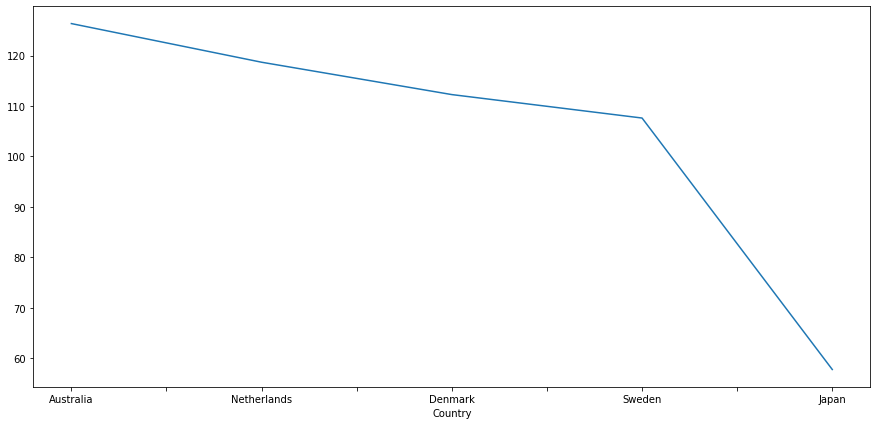

In [305]:
data_nettoyer_trimestre['Depense'].groupby(data_nettoyer_trimestre['Country']).agg('mean').sort_values(ascending = False).head(5).plot(figsize = (15, 7))


#### Montant. Tracez l’évolution mensuelle du montant médian d’un panier client pour chacun de ces cinq pays.

<AxesSubplot:xlabel='Country'>

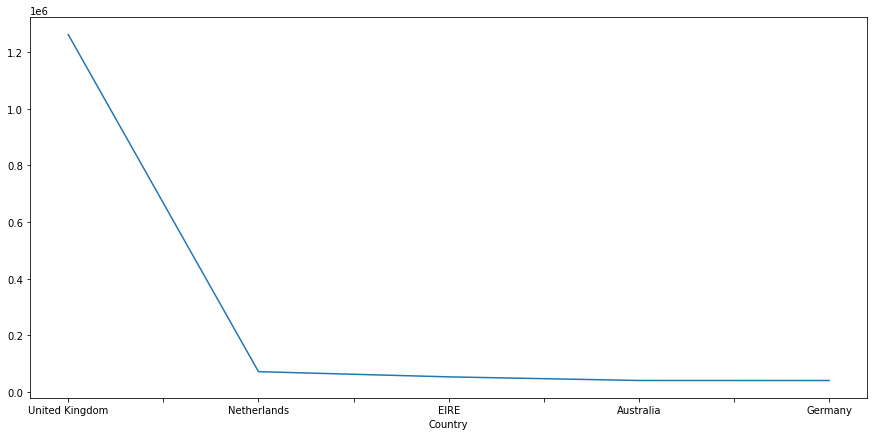

In [306]:
data_nettoyer_trimestre['Depense'].groupby(data_nettoyer_trimestre['Country']).agg('sum').sort_values(ascending = False).head(5).plot(figsize = (15, 7))

---

# 2. Volume.
- Fréquence. A quelle fréquence dépensent les 100 plus gros clients du Royaume-Uni ?

In [307]:
import datetime

In [308]:
data_frequence = data_nettoyer.copy()

In [309]:
dt_reference = data_frequence.InvoiceDate.max()
dt_reference = dt_reference + datetime.timedelta(days = 1)

In [310]:
dt_reference

Timestamp('2011-12-10 12:50:00')

In [311]:
data_frequence['jours_dernier_achat'] = dt_reference - data_frequence.InvoiceDate
data_frequence['num_jours_le_dernier_achat'] = data_frequence['jours_dernier_achat'].astype('timedelta64[D]')

In [312]:
data_frequence.head(2)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour,Depense,jours_dernier_achat,num_jours_le_dernier_achat
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1,15.30,374 days 04:24:00,374.0
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,1,20.34,374 days 04:24:00,374.0


In [313]:
client_history = data_frequence.groupby("CustomerID").min().reset_index()[['CustomerID', 'num_jours_le_dernier_achat']]
client_history.rename(columns={'num_jours_le_dernier_achat':'Achat_recent'}, inplace=True)
client_history.Achat_recent.describe()

count    4339.000000
mean       92.518322
std       100.009747
min         1.000000
25%        18.000000
50%        51.000000
75%       142.000000
max       374.000000
Name: Achat_recent, dtype: float64

In [314]:
client_history.head()

,CustomerID,Achat_recent
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0


In [315]:
val = data_frequence[['CustomerID', 'Depense']].groupby("CustomerID").sum().reset_index()
client_history = client_history.merge(val, how='outer')
client_history.Depense = client_history.Depense+0.001
client_frequence = data_frequence[['CustomerID', 'Depense']].groupby("CustomerID").count().reset_index()
client_frequence.rename(columns={'Depense':'frequency'},inplace=True)
client_history = client_history.merge(client_frequence, how='outer')

In [316]:
client_history

,CustomerID,Achat_recent,Depense,frequency
0,12346.0,326.0,77183.601,1
1,12347.0,2.0,4310.001,182
2,12348.0,75.0,1797.241,31
3,12349.0,19.0,1757.551,73
4,12350.0,310.0,334.401,17
...,...,...,...,...
4334,18280.0,278.0,180.601,10
4335,18281.0,181.0,80.821,7
4336,18282.0,8.0,178.051,12
4337,18283.0,4.0,2045.531,721


#### Fréquence. A quelle fréquence dépensent les 100 plus gros clients du Royaume-Uni ?

In [317]:
client_history['Pays'] = data_frequence.Country

In [318]:
client_history.head()

,CustomerID,Achat_recent,Depense,frequency,Pays
0,12346.0,326.0,77183.601,1,United Kingdom
1,12347.0,2.0,4310.001,182,United Kingdom
2,12348.0,75.0,1797.241,31,United Kingdom
3,12349.0,19.0,1757.551,73,United Kingdom
4,12350.0,310.0,334.401,17,United Kingdom


In [319]:
united_kingdom = client_history[client_history['Pays'] == 'United Kingdom'].sort_values(by=['Depense'], ascending=False)
united_kingdom

,CustomerID,Achat_recent,Depense,frequency,Pays
4202,18102.0,1.0,259657.301,431,United Kingdom
3729,17450.0,8.0,194390.791,336,United Kingdom
55,12415.0,24.0,124914.531,716,United Kingdom
1334,14156.0,10.0,117210.081,1395,United Kingdom
3772,17511.0,3.0,91062.381,963,United Kingdom
...,...,...,...,...,...
723,13307.0,120.0,15.001,1,United Kingdom
3961,17763.0,263.0,15.001,1,United Kingdom
3324,16878.0,84.0,13.301,3,United Kingdom
3218,16738.0,298.0,3.751,1,United Kingdom


In [320]:
united_kingdom = united_kingdom.head(100)
united_kingdom

,CustomerID,Achat_recent,Depense,frequency,Pays
4202,18102.0,1.0,259657.301,431,United Kingdom
3729,17450.0,8.0,194390.791,336,United Kingdom
55,12415.0,24.0,124914.531,716,United Kingdom
1334,14156.0,10.0,117210.081,1395,United Kingdom
3772,17511.0,3.0,91062.381,963,United Kingdom
...,...,...,...,...,...
4207,18109.0,2.0,8004.921,441,United Kingdom
66,12428.0,26.0,7956.461,294,United Kingdom
2163,15290.0,5.0,7943.221,204,United Kingdom
334,12757.0,16.0,7834.651,364,United Kingdom


In [321]:
frequence_depensent = united_kingdom.frequency.mean()
frequence_depensent

504.57

In [322]:
display("Les 100 plus gros clients du Royaume-Uni dépensent a une fréquence de {} % ".format(frequence_depensent))

'Les 100 plus gros clients du Royaume-Uni dépensent a une fréquence de 504.57 % '

--- 

## II. Modèles (10 points)

#### 1. Quel sera le chiffre d’affaire global de la société en Décembre 2011 ?

In [323]:
Msk = (data_nettoyer['Annee']==2011) #& (data_clean['Mois'].between(1,3))
Msk = data_nettoyer[Msk]

In [324]:
Mask2 = (Msk[Msk['Mois'] == 12 ])

In [325]:
Mask2.head(3)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour,Depense
506150,2011-12-01 08:33:00,579899,23301,GARDENERS KNEELING PAD KEEP CALM,24,1.65,15687.0,United Kingdom,2011,12,1,39.60
506151,2011-12-01 08:33:00,579899,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,5.95,15687.0,United Kingdom,2011,12,1,17.85
506152,2011-12-01 08:33:00,579899,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,4,3.75,15687.0,United Kingdom,2011,12,1,15.00


In [326]:
Mask2.groupby(['Country']).agg({'Depense':'median'})

,Depense
Country,
Austria,142.80
Belgium,14.61
Channel Islands,30.00
Denmark,13.50
EIRE,16.50
Finland,41.60
France,16.80
Germany,17.34
Greece,16.50


In [327]:
united_kingdom_2 = Mask2[Mask2['Country'] == 'United Kingdom']
united_kingdom_2.head(2)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour,Depense
506150,2011-12-01 08:33:00,579899,23301,GARDENERS KNEELING PAD KEEP CALM,24,1.65,15687.0,United Kingdom,2011,12,1,39.60
506151,2011-12-01 08:33:00,579899,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,5.95,15687.0,United Kingdom,2011,12,1,17.85


In [328]:
united_kingdom_2.Country.unique()

array(['United Kingdom'], dtype=object)

In [329]:
ca = united_kingdom_2.Depense.sum()

In [330]:
print("le chiffre d’affaire global de la société en Décembre 2011 est de {} euro".format(ca))

le chiffre d’affaire global de la société en Décembre 2011 est de 471381.82 euro


#### 2. Combien de clients vont réaliser au moins un achat en Décembre 2011 en France ?